# Dataset Pelanggan Supermarket

<i>dataset obtained from PKS Data Science bootcamp



---



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data

df = pd.read_csv('data/pelanggan_supermarket.csv')
df.head()

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0




---



---



---



<b>Descriptive statistics

In [3]:
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000




---



---



---



<b>Handling missing value

In [4]:
print(df.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64


<b>Fill the missing value with "ffill" method

In [5]:
no_NaN = df.fillna(method = 'ffill')
no_NaN

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


<b>Re-check missing value

In [6]:
print(no_NaN.isnull().sum())

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64




---



---



---



<b> Handling outlier

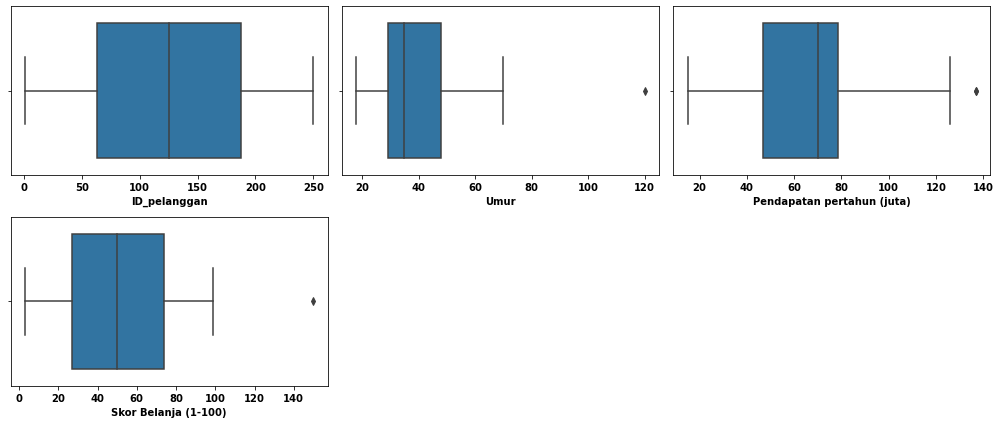

In [7]:
#Plotting columns before handling outlier

plt.figure(figsize=(14,6))

for i, j in enumerate(no_NaN.describe().columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = no_NaN[j])
    plt.tight_layout()
    
plt.show()

In [8]:
#Remove outlier

def get_Outliers_index(dframe):
    
    outliers_index = []
    for col in dframe.describe().columns:
        Q1 = dframe[col].quantile(0.25)
        Q3 = dframe[col].quantile(0.75)
    
        IQR = Q3-Q1
    
        lower_limit = Q1-(1.5*IQR)
        upper_limit = Q3+(1.5*IQR)
    
        outliers = dframe[ (dframe[col]<lower_limit) | (dframe[col]>upper_limit) ].index
        outliers_index.extend(outliers.to_list())
    
    outliers_index = set(outliers_index)  #Convert to set to remove duplicate numbers
    outliers_index = list(outliers_index) #Convert the set back to list
    
    outliers_index.sort()                 #Sort the list
    
    return outliers_index

get_Outliers_index(no_NaN)

[16, 198, 199, 249]

In [9]:
#DataFrame after handling outlier

out_cust = get_Outliers_index(no_NaN)

no_NaN.drop(out_cust, inplace=True)

display(no_NaN[["Umur","Pendapatan pertahun (juta)","Skor Belanja (1-100)"]])

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15,39.0
1,21.0,15,81.0
2,20.0,16,6.0
3,23.0,16,77.0
4,31.0,17,40.0
...,...,...,...
244,27.0,88,69.0
245,59.0,93,14.0
246,35.0,93,90.0
247,37.0,97,32.0


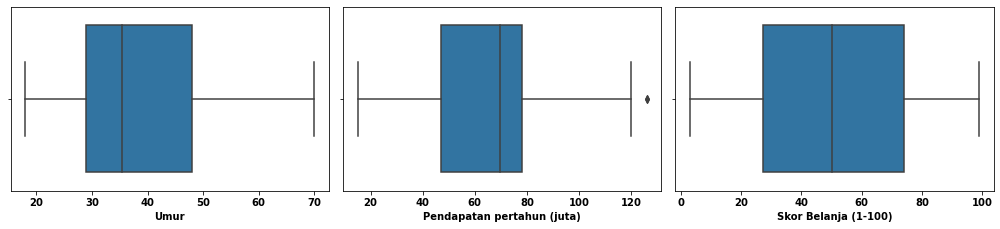

In [10]:
#Plotting data after handling outlier

plt.figure(figsize=(14,6))

for i, j in enumerate(no_NaN.describe().columns[1:4]):
    plt.subplot(2,3,i+1)
    sns.boxplot(x = no_NaN[j])
    plt.tight_layout()
    
plt.show()



---



---



---



<b>Inferential statistics

We will do hypothesis test for 100 sample random supermarket customer (pengunjung supermarket) with null hypothesis is average age of supermarket customer is 35. Test the hypothesis using p-value method.

In [11]:
#Random sampling

df_100 = no_NaN.sample(100,  random_state=1)
display(df_100)

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
68,69,Laki-laki,19.0,48,59.0
248,249,Perempuan,32.0,97,86.0
211,212,Laki-laki,25.0,77,12.0
225,226,Laki-laki,30.0,78,4.0
91,92,Laki-laki,18.0,59,41.0
...,...,...,...,...,...
5,6,Perempuan,22.0,17,76.0
184,185,Perempuan,41.0,99,39.0
186,187,Perempuan,54.0,101,24.0
49,50,Perempuan,31.0,40,42.0


In [12]:
#Change Umur column to integer

df_100['Umur'] = df_100['Umur'].astype('int')

In [13]:
#P-value

from statsmodels.stats.weightstats import ztest

z_test, p_value = ztest(x1 = df_100['Umur'], value = 35)

#print the Results
print(f'Z-test is :{z_test}')
print(f'p-value is :{p_value}')

Z-test is :2.4874107887154624
p-value is :0.012867672183696988


Analysis description:

Because p-value = 0.012867672183696988 which means p-value <0.05 (5% significance value), then H0 (null hypothesis) is rejected. So it can be concluded that the average age of supermarket customer is not the same as 35.



---



---



---



### Exploratory Data Analysis

<b>Univariate Analysis
    
Use distplot to see the pattern of data distribution.

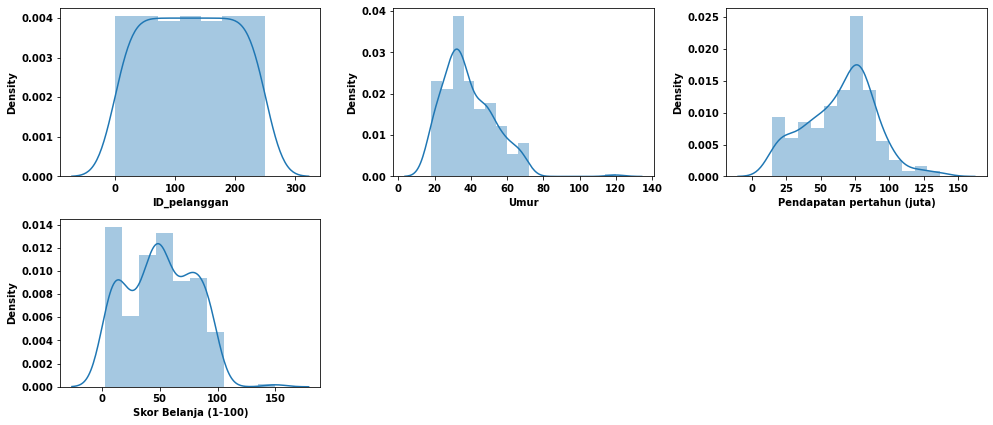

In [14]:
plt.figure(figsize=(14,6))

for i, j in enumerate(df.describe().columns):
    plt.subplot(2,3,i+1)
    sns.distplot(x = df[j], axlabel=j)
    plt.tight_layout()
    
plt.show()

From the plot above, The curvers for "Umur" and "Pendapatan pertahun" are not symmetrical or tends to tilt to the left/right, which means that the data is not normally distributed or the distribution of the data is not normal.

---

<b>Bivariate Analysis

Use dataframe before handling missing value and outlier and use barplot to see comparison of "Skor Belanja" between female customer and male customer.

In [15]:
#Sort dataframe based on Skor Belanja.

skor = df.sort_values(by="Skor Belanja (1-100)",ascending=False)
skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0
...,...,...,...,...,...
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN


<b> Highest Score

In [16]:
high_skor = skor.head()
high_skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
16,17,Perempuan,35.0,21,150.0
11,12,Perempuan,35.0,19,99.0
19,20,Perempuan,35.0,23,98.0
185,186,Laki-laki,30.0,99,97.0
145,146,Laki-laki,28.0,77,97.0


<b> Lowest Score

In [17]:
low_skor = skor.tail()
low_skor

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
8,9,Laki-laki,64.0,19,3.0
49,50,Perempuan,31.0,40,NaN
61,62,Laki-laki,19.0,46,NaN
94,95,Perempuan,32.0,60,NaN
117,118,Perempuan,49.0,65,NaN


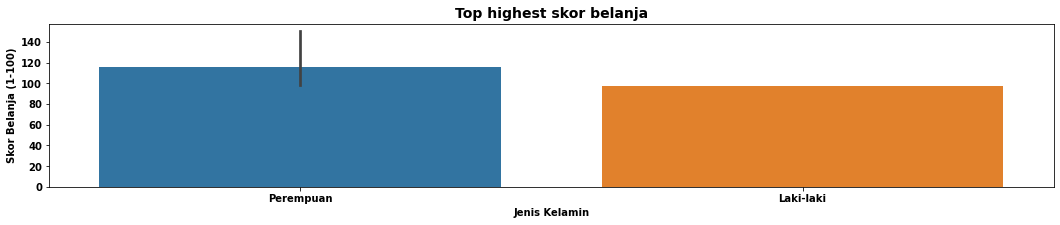

In [18]:
#Highest Score

plt.figure(figsize=(18,3))
sns.barplot(data=high_skor,
           x="Jenis Kelamin",
           y="Skor Belanja (1-100)")
plt.title('Top highest skor belanja', fontsize='14')
plt.show()

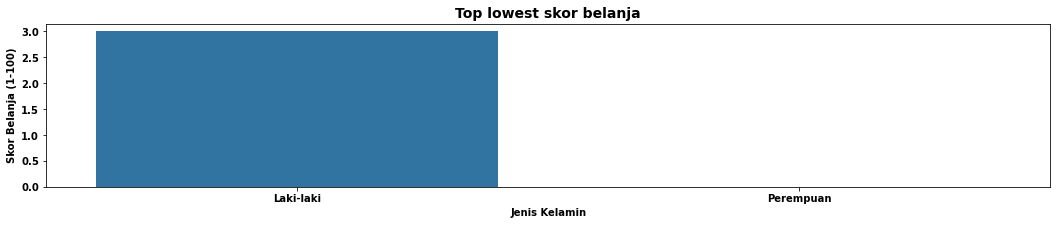

In [19]:
#Lowest Score

plt.figure(figsize=(18,3))
sns.barplot(data=low_skor,
           x="Jenis Kelamin",
           y="Skor Belanja (1-100)")
plt.title('Top lowest skor belanja', fontsize='14')
plt.show()

From the plot above, its shows that the shopping score of female customer is higher than the shopping score of male customer.

---

<b>Multivariate Analysis

We will explore with multivariate analysis to see the highest correlation of each data in the dataset before handling missing value and outlier.

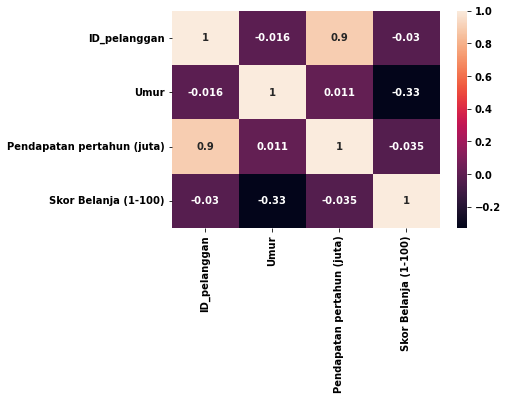

In [20]:
df_drop = df.drop(columns="Jenis Kelamin")
sns.heatmap(df_drop.corr(), annot=True, fmt='.2g')

plt.show()

Based on the plot, correlation for age and shopping score variable has the darkest color with a negative value, which means the correlation between the two variables is quite strong but not in the same direction, it means if the age of customer is getting older, the shopping score tends to be smaller/decreasing, and vice versa.



---

---



---





<b>Scalling dataframe

In [21]:
#feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(no_NaN[['Umur','Skor Belanja (1-100)']])

<b>Clustering

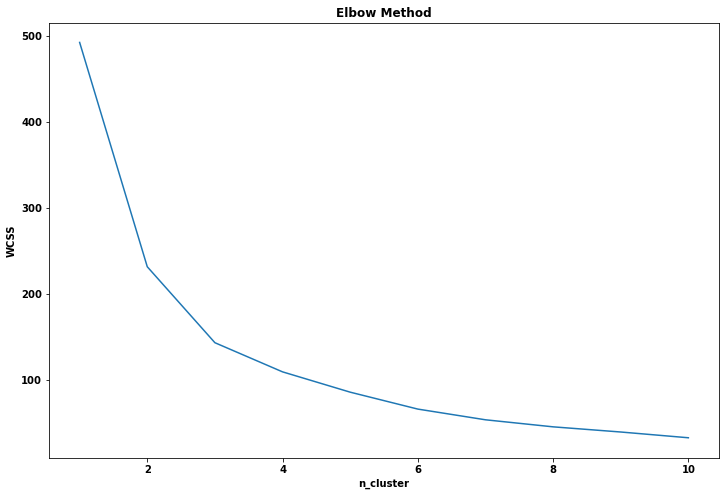

In [22]:
#Elbow method to find the best number of clusters.

plt.figure(figsize=(12,8))
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('WCSS')
plt.show()

In [28]:
#With elbow method, we get n=3 for the best number of cluster

kmeans3 = KMeans(n_clusters=3, random_state=40).fit(scaled_data)
labels3 = kmeans3.labels_

cluster_3 = pd.DataFrame(scaled_data, 
                           columns=['Umur','Skor Belanja (1-100)'])
cluster_3['k3'] = labels3

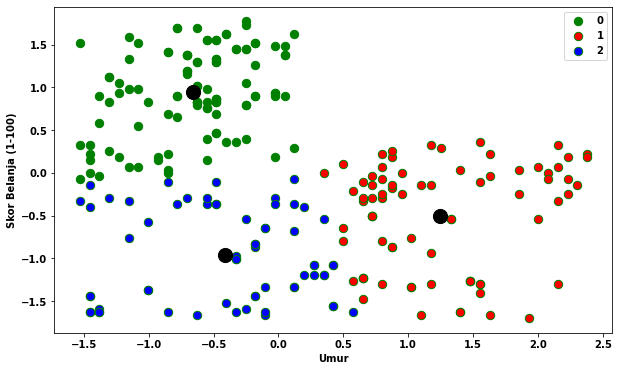

In [24]:
#Plotting cluster

plt.figure(figsize=(10,6))

plt.scatter(cluster_3['Umur'][cluster_3.k3 == 0], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 0], 
            c = 'g', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 0)
plt.scatter(cluster_3['Umur'][cluster_3.k3 == 1], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 1], 
            c = 'r', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-',
            label = 1)
plt.scatter(cluster_3['Umur'][cluster_3.k3 == 2], 
            cluster_3['Skor Belanja (1-100)'][cluster_3.k3 == 2], 
            c = 'b', 
            s = 70,
            edgecolors = 'green', 
            linestyle = '-', 
            label = 2)

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='k', s=200)
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.legend()
plt.show()

In [25]:
#Silhoutte score for n=3
from sklearn.metrics import silhouette_score

print('silhouette_score untuk n = 3 :',silhouette_score(scaled_data, labels = labels3))

silhouette_score untuk n = 3 : 0.4632211897833843


---
<b>Analyze clustering result

In [26]:
#Inverse transform

inv_scaled = scaler.inverse_transform(scaled_data)
new_df1 = pd.DataFrame(data= inv_scaled,
                       columns=['Umur','Skor Belanja (1-100)'])

new_df1['label_k3'] = labels3
new_df1

,Umur,Skor Belanja (1-100),label_k3
0,19.0,39.0,2
1,21.0,81.0,0
2,20.0,6.0,2
3,23.0,77.0,0
4,31.0,40.0,2
...,...,...,...
241,27.0,69.0,0
242,59.0,14.0,1
243,35.0,90.0,0
244,37.0,32.0,2


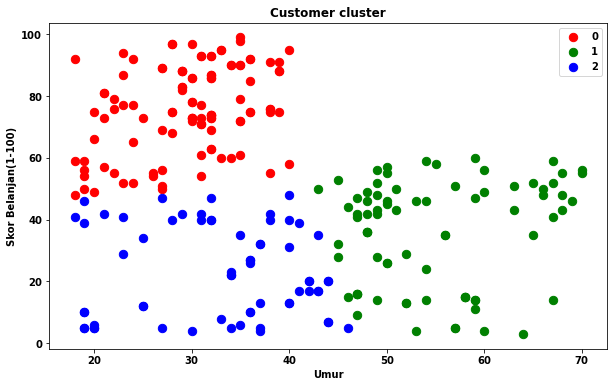

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 0], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 0], 
            c = 'r', 
            s = 70,
            label = 0)
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 1], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 1], 
            c = 'g', 
            s = 70,
            label = 1)
plt.scatter(new_df1['Umur'][new_df1.label_k3 == 2], 
            new_df1['Skor Belanja (1-100)'][new_df1.label_k3 == 2], 
            c = 'b', 
            s = 70, 
            label = 2)

plt.title('Customer cluster')
plt.xlabel('Umur')
plt.ylabel('Skor Belanjan(1-100)')
plt.legend()
plt.show()

Based on the plot above, we get 3 clusters :blue cluster, red cluster, and green cluster. 

The first cluster is blue cluster for a group of young customers whose ages range from 20 to 40 years and have low shopping scores.

Second cluster is red cluster for groups of young customers whose ages range from 20 to 40 years and have high shopping scores.

Third cluster is green cluster for groups of elderly customers whose ages range from 50 to 70 years and have low shopping scores.